# Filter Base Feature Selection
1. **In Filter base feataure selection we can filter the data using different statistical test.Some popular statistical tests are**
   1. **Variance Infleance Threshold**
   2. **ANOVA**
   3. **Chie-Square**

# import pacakages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# laod data uisng `fetch openml`

In [2]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Extract features (pixel values) and labels
# X, y = mnist["data"], mnist["target"]

C:\Users\Laptop House\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Feature

In [10]:
feature=mnist.data
feature.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# target

In [8]:
target=mnist.target
target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

# now view 

In [15]:
feature.iloc[0,:].values.reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

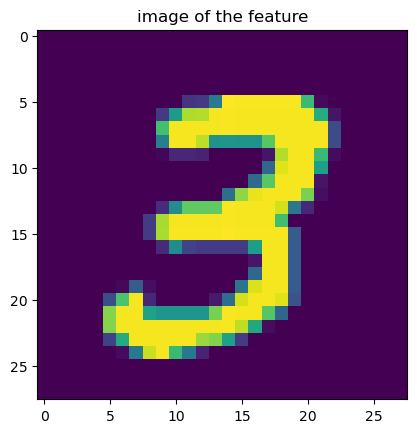

In [22]:
plt.title('image of the feature')
plt.imshow(feature.iloc[7,:].values.reshape(28,28))
plt.show()

In [21]:
target.iloc[7]

'3'

# First we can train the model before any feataure selection

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [24]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=42)

In [25]:
x_train.shape

(56000, 784)

In [26]:
x_test.shape

(14000, 784)

# Train the model

In [27]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# prediction

In [28]:
pre=model.predict(x_test)
pre

array(['8', '4', '5', ..., '2', '7', '1'], dtype=object)

# Fun for Evulation

In [60]:
def evulation(actual,pre):
    acc=accuracy_score(actual,pre)
    pre=precision_score(actual,pre,average='macro')
    recal=recall_score(actual,pre,average='macro')
    f_score=f1_score(actual,pre,average='macro')
    
    return {"acc":acc,"pre":pre,"recall":recal,"f_score":f1_score}

In [58]:
accuracy_score(y_test,pre)

0.9177857142857143

# Now Apply feature Selection

1. **Variance Inflence Threshold**

In [66]:
from sklearn.feature_selection import VarianceThreshold

In [31]:
vif=VarianceThreshold(threshold=0.05)
x_train_trans=vif.fit_transform(x_train)
x_test_tran=vif.fit_transform(x_test)

In [32]:
selected_col=vif.get_support(indices=True)

In [43]:
len(selected_col)

683

In [47]:
x_train.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [49]:
new_x_train=x_train.iloc[:,selected_col]
new_x_test=x_test.iloc[:,selected_col]

In [50]:
new_x_train.shape

(56000, 683)

**Now we can see that `x_train` has `784` col now after tyransformation we can get `663`**

In [51]:
model=LogisticRegression()
model.fit(new_x_train,y_train)

LogisticRegression()

In [52]:
pre=model.predict(new_x_test)

In [53]:
accuracy_score(y_test,pre)

0.9177857142857143

**We can see that we can get the same result after selection**